In [1]:
import control
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ml
import meucontrole as mc
import sympy as sp


In [2]:
import warnings

warnings.filterwarnings("ignore")

from IPython.display import display, Math


def mylegend():
    handles, labels = plt.gca().get_legend_handles_labels()
    i = 1
    while i < len(labels):
        if labels[i] in labels[:i]:
            del labels[i]
            del handles[i]
        else:
            i += 1

    plt.legend(handles, labels)


# 1)
Considere  o  sistema  em  malha  aberta  com  função  de  transferência  abaixo  e  o  valor  de amortecimento que se deseja obter nos polos dominantes em malha fechada.
$$
G(s) = \frac{1}{s(s+2)(s+3)(s+5)}, \qquad \zeta = \frac{\sqrt{2}}{2}
$$

In [3]:
s = control.TransferFunction.s
G = 1 / (s * (s + 2) * (s + 3) * (s + 5))
zeta_target = np.sqrt(2) / 2
display(G)


TransferFunction(array([1]), array([ 1, 10, 31, 30,  0]))

## 1.a)
Obtenha o LGR utilizando o comando rlocus. Qual o ganho do sistema que, ao ser realimentado, gerará  um  sistema  com  fator  de  amortecimento 𝜁desejado?  Qual  é  o  valor  do  polo  de  malha fechada que gera esse amortecimento? E qual o máximo sobressinal (overshoot) esperado? Qual o tempo de pico esperado?

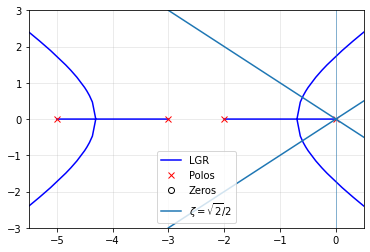

In [4]:
LGR = control.root_locus(G, plot=False)

# Cria o gráfico de LGR
plt.plot(LGR[0].real, LGR[0].imag, "b", label="LGR")
# Plota os polos
p = G.pole()
plt.plot(p.real, p.imag, "rx", label="Polos")
# Plota os zeros
z = G.zero()
plt.plot(z.real, z.imag, "ko", mfc="none", label="Zeros")

# Cria as linhas com o fator de amortecimento desejado
slope = np.sqrt(-1 + 1 / zeta_target ** 2)
plt.axline((0, 0), slope=slope, label=r"$\zeta=\sqrt{2}/2$")
plt.axline((0, 0), slope=-slope, label=r"$\zeta=\sqrt{2}/2$")


# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.xlim(-5.5, 0.5)
plt.ylim(-3, 3)
plt.axvline(linewidth=1, alpha=0.5)
# plt.axhline(linewidth=1, alpha=.5)
# Cria a legenda
mylegend()

plt.show()


In [5]:
p = -0.6 + 0.6j  # Encontrado com uso iterativo do gráfico e confirmado algebricamente
K = np.abs(1 / G(p))
print(f"K = {K:.7}")


K = 14.1984


$$K=14.1984$$
$$p = \sigma + j\omega_d = -0.6 \pm 0.6j$$
$$Overshoot = \exp (-\pi \cdot \lvert\frac{\sigma}{\omega_d}\rvert) \approx 4.32\%$$
$$t_p = \frac{\pi}{\omega_d} \approx 5.236 \,\mathrm{s} $$

## b)
Utilizando o comando feedback, gere o sistema de malha fechada (realimentação unitária) com o ganho escolhido. Então, obtenha a resposta ao degrau do sistema realimentado. Após, obtenha os valores aproximados do máximo sobressinal e tempo de pico(pode ser via data cursor). Verifique se os valores obtidos estão de acordo com a teoria (ou seja, comparar com o que foi informado no item anterior). Caso difiram, qual o motivo?

In [6]:
Gf = control.feedback(K * G)  # Sistema realimentado com ganho K
w_n, zeta, p = control.damp(Gf)
p_ = max(p)  # polo de Gf mais próximo da origem

# calculo do overshoot teorico
peak_theory = (np.pi / np.abs(p_.imag), 1 + np.exp(-np.pi * np.abs(p_.real / p_.imag)))
print(f"(tp, overshoot) = {peak_theory}")


_____Eigenvalue______ Damping___ Frequency_
      -4.4      +0.6j     0.9908      4.441
      -4.4      -0.6j     0.9908      4.441
      -0.6      +0.6j     0.7071     0.8485
      -0.6      -0.6j     0.7071     0.8485
(tp, overshoot) = (5.235987755982991, 1.0432139182637723)


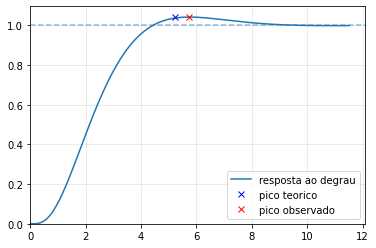

teoria: (tp, overshoot%) = (5.236 s, 4.32%)
real:   (tp, overshoot%) = (5.741 s, 4.14%)


In [7]:
# Grafico de resposta ao degrau
step = np.array(control.step_response(Gf))
plt.plot(*step, label="resposta ao degrau")
# Entrada degrau
plt.axhline(1, linestyle="--", alpha=0.5)

# Overshoot teorico
plt.plot(peak_theory[0], peak_theory[1], 'bx', label="pico teorico")
# Overshoot real
peak_arg = np.argmax(step[1])
peak_real = step[0, peak_arg], step[1, peak_arg]
plt.plot(peak_real[0], peak_real[1], 'rx', label="pico observado")

# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=.5, alpha=.5)
plt.xlim(left=0)
plt.ylim(bottom=0)
# Cria a legenda
mylegend()

plt.show()

print(f"teoria: (tp, overshoot%) = ({peak_theory[0]:.3f} s, {peak_theory[1] - 1:.2%})")
print(f"real:   (tp, overshoot%) = ({peak_real[0]:.3f} s, {peak_real[1] - 1:.2%})")

Podemos observar que o pico acontece ligeiramente mais tarde e foi um pouco menor que o pico esperado. A diferença é pequena, mas existe pois o valor calculado é correto apenas para um sistema com 2 polos, enquanto o sistema analisado tem 4 polos. Os polos mais próximos da origem dominam esses parâmetros e, portanto, aproximam o valor real.

## c)
obtenha a resposta à rampa unitária do  sistema  realimentado.  Analisea  resposta  em  regime  permanente.  Plote  também  a  função  do erro obtido pelo tempo. Calcule o erro em regime permanente coma fórmula apresentada em aula, e verifique que o mesmo erro em regime permanente é obtido na simulação.

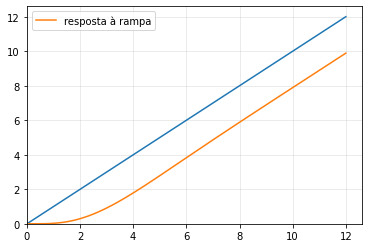

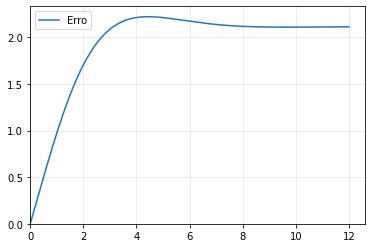

erro a entrada em rampa
teoria: 2.113
real:   2.112


In [8]:
t = np.linspace(0, 12, 12000)  # vetor de tempo
u = t  # vetor de entrada (rampa)
_, y_ramp = control.forced_response(Gf, t, u)  # resposta a rampa
plt.plot(t, u)
plt.plot(t, y_ramp, label="resposta à rampa")

# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)
# Cria a legenda
mylegend()

plt.show()


In [ ]:
# Erro relativo à rampa
plt.plot(t, u - y_ramp, label="Erro")

# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)
# Cria a legenda
mylegend()

plt.show()


In [ ]:
err_ramp_theo = 30 / 14.2
err_ramp_real = (u - y_ramp)[-1]
print("erro a entrada em rampa")
print(f"teoria: {err_ramp_theo:.03f}")
print(f"real:   {err_ramp_real:.03f}")


Podemos ver que o erro à resposta degrau real concorda com a teoria (com ligeiro erro devido à integração numérica e pequenos efeitos da resposta transiente ainda presentes em 12 segundos)

# 2)
Considere  agorao  mesmo  sistema  em  malha  aberta 𝐺(𝑠),  masagoradeseja-seque  os  polos dominantes de malha fechada possuam as seguintes características:
$$
\zeta = \frac{\sqrt{2}}{2}, \qquad \omega_n = \sqrt{2}
$$

## a)
Que diferença, em teoria, haveria entre um sistema com os polos de malha fechada acima em relação ao sistema obtido no item 1? Considere, para exemplificar, o que se esperaria da resposta ao degrau. Ignore o efeito de polos não dominantes para simplificar a comparação.

O novo sistema teria o mesmo fator de amortecimento, mas frequência natural maior. A constante de tempo, então, é menor (inversamente proporcional à frequência natural), e outros fatores não mudariam significativamente.

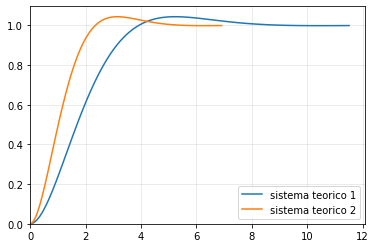

In [9]:
G1_ = mc.zpk([], [-0.6 + 0.6j, -0.6 - 0.6j], 0.72)
G2_ = mc.zpk([], [-1 + 1j, -1 - 1j], 2)
plt.plot(*control.step_response(G1_), label="sistema teorico 1")
plt.plot(*control.step_response(G2_), label="sistema teorico 2")

# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)
# Cria a legenda
mylegend()

plt.show()


## b)
Projete  um compensadorde  avanço  capaz  de  posicionar  os  polos  dominantes  do  sistema  de malha fechada com as características apresentadas no item 2. Não usar funções prontas no MATLABque calculem diretamente o compensador, resolver manualmente(pode usar funções do MATLAB para  cálculos  intermediários).  Se  quiser,  pode  resolver  à  mão,  e  adicionar  uma  foto  anexada  ao relatório com a resolução.Outra possibilidade é fazer um programa em MATLAB resolvendo passo a passo, com código comentado explicando por que cada contribui para a resolução do problema. Ao  projetar  controlador,  escolher  um  zero  que  cancele  um  polo.  Qual  é  o  melhor  polo  a  ser cancelado? **Obs**: projetar apenas polo e zero(condição angular), pois o ganho(condição modular)será projetado no próximo item.

In [10]:
target = -1 + 1j  # polo que desejamos alcançar

# Escolhemos T que cancela o polo não nulo mais próximo da origem
T = -1 / np.max(G.pole()[G.pole() < 0])


Para projetar o polo, devemos nos atentar à condição angular:

$$
\angle(G H)|_{s_p} = \angle(-1)
$$

Conhecendo o formato do nosso controlador de avanço, podemos expandir essas relações como:

$$
\angle[G(s) {(Ts + 1)}/{(\alpha Ts + 1)}]|_{s_p} = \angle(-1) \\
\angle(\alpha Ts + 1) = \angle{G(s) (Ts + 1) / (-1)}
$$

Tomando $A = Ts$ e $B = - G(s) (Ts + 1)$, temos então:

$$
\angle(\alpha A + 1) = \angle{B}
$$

A partir dessa igualdade de fases, sabemos que $\alpha A + 1 = K B$, para algum $K > 0$ real. Podemos então igualar as partes imaginária e real de cada lado.

$$
\Im(\alpha A + 1) = K \Im(B)\\
\Re(\alpha A + 1) = K \Re(B)\\
$$

Como sabemos que $\alpha, K \in \R$, podemos simplificar o lado da esquerda das igualdades:

$$
\Im(\alpha A + 1) = \alpha\Im(A)\\
\Re(\alpha A + 1) = \alpha\Re(A) + 1
$$

Dividindo a equação real pela imaginária, temos:

$$
\begin{align*}
\frac{\alpha\Re(A) + 1}{\alpha\Im(A)} &= \frac{\Re(B)}{\Im(B)} \\
\frac{1}{\alpha\Im(A)} &= \frac{\Re(B)}{\Im(B)} - \frac{\Re(A)}{\Im(A)} \\
\frac{1}{\alpha\Im(A)} &= \frac{\Re(B) \Im(A) - \Re(A) \Im(B)}{\Im(B) \Im(A)}
\end{align*}
$$

$$
\begin{align*}
\alpha &= \frac{\Im(B)}{\Re(B)\Im(A) - \Re(A) \Im(B)} \\
\alpha &= \frac{\Im[G(s) (Ts + 1)]}{\Re[G(s) (Ts + 1)]\Im(Ts) - \Im[G(s) (Ts + 1)] \Re(Ts)}
\end{align*}
$$

In [11]:
# variáveis intermediárias
A = T * target
B = -G(target) * (T * target + 1)
# calcula alpha
alpha = B.imag / (B.real * A.imag - B.imag * A.real)

print(f"T = {T:.4}, alpha = {alpha:.4}")
C = mc.zpk([-1 / T], [-1 / (alpha * T)], 1)
C


T = 0.5, alpha = 0.1429


TransferFunction(array([1., 2.]), array([ 1., 14.]))

## c)
Obtenha o LGR do sistema planta  +  controlador utilizando o comando rlocus. Qual o ganho do controladorque, ao ser realimentado, gerará um sistema com 𝜁e 𝜔𝑛desejados? Qual o máximo sobressinal (overshoot) esperado? Qual o tempo de pico esperado?

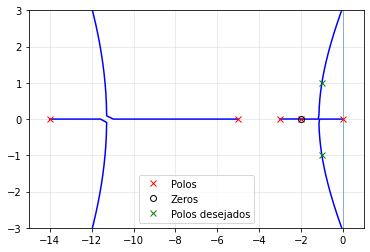

In [12]:
Gc = G * C  # sistema antes do ganho do controlador

# Grafico LGR
from control.rlocus import _default_gains

# kvect especificado pois o automático usa valores grandes damis
LGR = control.root_locus(Gc, kvect=np.logspace(0, 4, 1000), plot=False)
plt.plot(LGR[0].real, LGR[0].imag, "b")
# Polos
p = Gc.pole()
plt.plot(p.real, p.imag, "rx", label="Polos")
# Zeros
z = Gc.zero()
plt.plot(z.real, z.imag, "ko", mfc="none", label="Zeros")

# Polos desejados
plt.plot(target.real, ((target.imag, -target.imag,),), "gx", label="Polos desejados")

# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.axvline(linewidth=1, alpha=0.5)
# plt.axhline(linewidth=1, alpha=0.5)
plt.xlim(-15, 1)
plt.ylim(-3, 3)

# Cria a legenda
mylegend()

plt.show()


In [13]:
Kc = np.abs(1 / (Gc)(target))  # Resolve a condição modular
print(f"Kc = {Kc:.4}")


Kc = 170.0


## d)
Efetuar mesma análise que item 1.b), comparando ambos os resultados.

In [14]:
Gfc = control.feedback(Kc * Gc)  # Sistema com controlador, ganho e feedback

w_n_c, zeta_c, p_c = control.damp(Gfc)
p_c_ = max(p_c)
peak_theory_c = (
    np.pi / np.abs(p_c_.imag),
    1 + np.exp(-np.pi * np.abs(p_c_.real / p_c_.imag)),
)
print(f"(tp, overshoot) = {peak_theory_c}")


_____Eigenvalue______ Damping___ Frequency_
    -13.87                     1      13.87
    -6.127                     1      6.127
        -2                     1          2
        -1        +1j     0.7071      1.414
        -1        -1j     0.7071      1.414
(tp, overshoot) = (3.1415926535897936, 1.0432139182637727)


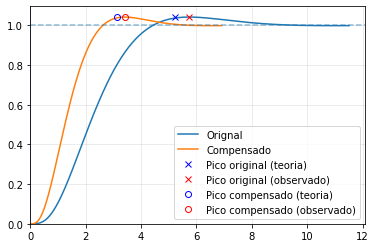

compensado(teoria): (tp, overshoot%) =(3.142 s, 4.32%)
compensado(real):   (tp, overshoot%) =(3.420 s, 4.16%)
original(teoria):   (tp, overshoot%) =(5.236 s, 4.32%)
original(real):     (tp, overshoot%) =(5.741 s, 4.14%)


In [15]:
# Resposta ao degrau original
step = np.array(control.step_response(Gf))
plt.plot(*step, label="Orignal")
# Resposta ao degrau controlada
step_c = np.array(control.step_response(Gfc))
plt.plot(*step_c, label="Compensado")
# Degrau
plt.axhline(1, linestyle="--", alpha=0.5)

# Picos do sistema original
plt.plot(peak_theory[0], peak_theory[1], "bx", label="Pico original (teoria)")
plt.plot(peak_real[0], peak_real[1], "rx", label="Pico original (observado)")

# Picos do sistema compensado
peak_arg = np.argmax(step_c[1])
peak_real_c = step_c[0, peak_arg], step_c[1, peak_arg]
plt.plot(
    peak_theory_c[0],
    peak_theory_c[1],
    "bo",
    mfc="none",
    label="Pico compensado (teoria)",
)
plt.plot(
    peak_real_c[0],
    peak_real_c[1],
    "ro",
    mfc="none",
    label="Pico compensado (observado)",
)


# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.axvline(linewidth=1, alpha=0.5)
plt.axhline(linewidth=1, alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)

# Cria a legenda
mylegend()

plt.show()


In [ ]:
print(
    "compensado(teoria): (tp, overshoot%) ="
    f"({peak_theory_c[0]:.3f} s, {peak_theory_c[1] - 1:.2%})"
)
print(
    "compensado(real):   (tp, overshoot%) ="
    f"({peak_real_c[0]:.3f} s, {peak_real_c[1] - 1:.2%})"
)
print(
    "original(teoria):   (tp, overshoot%) ="
    f"({peak_theory[0]:.3f} s, {peak_theory[1] - 1:.2%})"
)
print(
    "original(real):     (tp, overshoot%) ="
    f"({peak_real[0]:.3f} s, {peak_real[1] - 1:.2%})"
)



A diferença relativa entre os valores de pico e de tempo de pico são parecidas com o primeiro caso. Em valores absolutos, o tempo de pico foi menor no sistema com controlador, como esperado.

## e)
Efetuar mesma análise que item 1.c), comparando ambos os resultados.

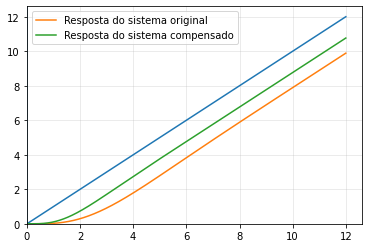

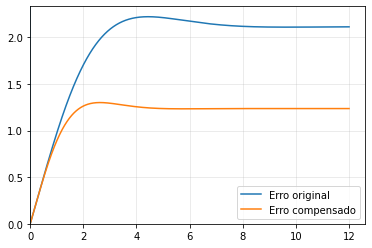

erro a entrada em rampa
teoria:       1.235
real:         1.235
teoria(orig): 2.113
real(orig):   2.112


In [16]:
# Vetor de tempo
t = np.linspace(0, 12, 12000)
# Vetor de entrada rampa
u = t

# Resposta do sistema original
_, y_ramp = control.forced_response(Gf, t, u)
# Resposta do sistema compensado
_, y_ramp_c = control.forced_response(Gfc, t, u)
plt.plot(t, u)
plt.plot(t, y_ramp, label="Resposta do sistema original")
plt.plot(t, y_ramp_c, label="Resposta do sistema compensado")

# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.axvline(linewidth=1, alpha=0.5)
plt.axhline(linewidth=1, alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)

mylegend()
plt.show()


In [ ]:
# Erro relativo à rampa
plt.plot(t, u - y_ramp, label="Erro original")
plt.plot(t, u - y_ramp_c, label="Erro compensado")

# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.axvline(linewidth=1, alpha=0.5)
plt.axhline(linewidth=1, alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)

mylegend()
plt.show()


err_ramp_theo_c = (1 / (Kc * Gc * s).minreal()(0)).real
err_ramp_real_c = (u - y_ramp_c)[-1]
print("erro a entrada em rampa")
print(f"teoria:       {err_ramp_theo_c:.04}")
print(f"real:         {err_ramp_real_c:.04}")
print(f"teoria(orig): {err_ramp_theo:.04}")
print(f"real(orig):   {err_ramp_real:.04}")


Como antes, o erro a entrada de rampa é igual à teoria. Pode-se observar, entretanto, que o erro diminui quando comparado ao sistema original. Também podemos ver que o sistema compensado alcança o erro permanente em menos tempo.

## f)
Projete um compensador por atraso de fase que reduza o erro em regime permanente na resposta à  rampa  em  10x  (erro  novo  =  erro  antigo  /  10).  Assuma que  as  aproximações  (chamadas  de “resoluções grosseiras” no slide) podem ser utilizadas sem maiores problemas.  Discuta como você escolheu o valor do zero do compensador, e porque uma escolha muito diferente disso poderia ser ruim. Plote a resposta ao degrau e à rampa, e compare com o que foi obtido nos itens 2.d e 2.e

Escolhemos $\beta$ e $K_c$ de acordo com nossos objetivos de projeto. Desejamos melhorar a resposta em regime permanente por um fator de 10, com mínimo impacto nos nossos polos dominantes. para isso, precisamos escolher $1/T$ muito menor que a magnitude dos polos dominantes e $K \approx 1$. Atendendo essa condição, nosso controlador terá a condição modular aproximadamente atendida. Por outro lado, valores maiores de $T$ apresentam projetos mais agressivos, então não podemos aumentar $T$ indiscriminadamente. Aqui, para facilitar nosso trabalho, vamos tomar $K_c = 1$. Para 

In [17]:
Kv = (Kc * G * C * s).minreal()(0).real
gain_target = Kv * 10
Kc2 = 1
T = 10 / np.abs(target.real)  # 1/T = 0.1*sigma desejado
beta = gain_target / Kv / Kc2
print(f"T, beta = {T:.4}, {beta:.4}")
C2 = Kc2 * (s + 1 / T) / (s + 1 / T / beta)
display(C2)
G_final = control.feedback(Kc * C * C2 * G)
print(f"Alteração de fase nos polos dominates: {np.angle(C2(target))*180/np.pi:.4}°")
print(f"Módulo ao redor do polo dominante: {np.abs(C2(target)):.4}")
print(
    f"Novo polo dominante: {G_final.pole()[-2]:.4}"
)  # penúltimo pois existe o polo do controlador


T, beta = 10.0, 10.0


TransferFunction(array([1. , 0.1]), array([1.  , 0.01]))

Alteração de fase nos polos dominates: -2.725°
Módulo ao redor do polo dominante: 0.9561
Novo polo dominante: (-0.9537-0.9247j)


In [18]:
w_n_f, zeta_f, p_f = control.damp(G_final)
p_f_ = p_f[-2]
peak_theory_f = (
    np.pi / np.abs(p_f_.imag),
    1 + np.exp(-np.pi * np.abs(p_f_.real / p_f_.imag)),
)
print(f"(tp, overshoot) = {peak_theory_f}")


_____Eigenvalue______ Damping___ Frequency_
    -13.87                     1      13.87
    -6.115                     1      6.115
        -2                     1          2
   -0.9537   +0.9247j      0.718      1.328
   -0.9537   -0.9247j      0.718      1.328
   -0.1135                     1     0.1135
(tp, overshoot) = (3.3973800261631464, 1.039154605553531)


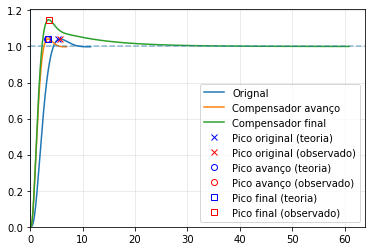

final(teoria):    (tp, overshoot%) =(3.397 s, 3.92%)
final(real):      (tp, overshoot%) =(3.524 s, 14.83%)
avanço(teoria):   (tp, overshoot%) =(3.142 s, 4.32%)
avanço(real):     (tp, overshoot%) =(3.420 s, 4.16%)
original(teoria): (tp, overshoot%) =(5.236 s, 4.32%)
original(real):   (tp, overshoot%) =(5.741 s, 4.14%)


In [19]:
# Resposta ao degrau original
step = np.array(control.step_response(Gf))
plt.plot(*step, label="Orignal")
# Resposta ao degrau controlada (avanço)
step_c = np.array(control.step_response(Gfc))
plt.plot(*step_c, label="Compensador avanço")
# Resposta ao degrau controlada final
step_f = np.array(control.step_response(G_final))
plt.plot(*step_f, label="Compensador final")
# Degrau
plt.axhline(1, linestyle="--", alpha=0.5)

# Picos do sistema original
plt.plot(peak_theory[0], peak_theory[1], "bx", label="Pico original (teoria)")
plt.plot(peak_real[0], peak_real[1], "rx", label="Pico original (observado)")

# Picos do sistema com avanço
peak_arg = np.argmax(step_c[1])
peak_real_c = step_c[0, peak_arg], step_c[1, peak_arg]
plt.plot(
    peak_theory_c[0], peak_theory_c[1], "bo", mfc="none", label="Pico avanço (teoria)",
)
plt.plot(
    peak_real_c[0], peak_real_c[1], "ro", mfc="none", label="Pico avanço (observado)",
)

# Picos do sistema final
peak_arg = np.argmax(step_f[1])
peak_real_f = step_f[0, peak_arg], step_f[1, peak_arg]
plt.plot(
    peak_theory_f[0], peak_theory_f[1], "bs", mfc="none", label="Pico final (teoria)",
)
plt.plot(
    peak_real_f[0], peak_real_f[1], "rs", mfc="none", label="Pico final (observado)",
)


# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.axvline(linewidth=1, alpha=0.5)
plt.axhline(linewidth=1, alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)

# Cria a legenda
mylegend()

plt.show()


In [ ]:
print(
    "final(teoria):    (tp, overshoot%) ="
    f"({peak_theory_f[0]:.3f} s, {peak_theory_f[1] - 1:.2%})"
)
print(
    "final(real):      (tp, overshoot%) ="
    f"({peak_real_f[0]:.3f} s, {peak_real_f[1] - 1:.2%})"
)
print(
    "avanço(teoria):   (tp, overshoot%) ="
    f"({peak_theory_c[0]:.3f} s, {peak_theory_c[1] - 1:.2%})"
)
print(
    "avanço(real):     (tp, overshoot%) ="
    f"({peak_real_c[0]:.3f} s, {peak_real_c[1] - 1:.2%})"
)
print(
    "original(teoria): (tp, overshoot%) ="
    f"({peak_theory[0]:.3f} s, {peak_theory[1] - 1:.2%})"
)
print(
    "original(real):   (tp, overshoot%) ="
    f"({peak_real[0]:.3f} s, {peak_real[1] - 1:.2%})"
)



A resposta ao degrau foi significativamente comprometida, com uma grande cauda antes do erro desaparecer. É possível notar que o comportamento não é mais significantemente próximo ao de um sistema com apenas 2 polos.

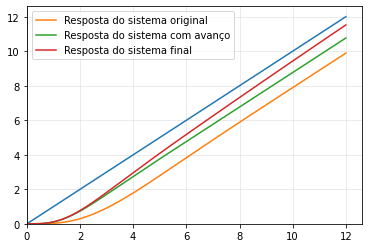

In [21]:
# Vetor de tempo
t = np.linspace(0, 12, 12000)
# Vetor de entrada rampa
u = t

# Resposta do sistema original
_, y_ramp = control.forced_response(Gf, t, u)
# Resposta do sistema avanço
_, y_ramp_c = control.forced_response(Gfc, t, u)
# Resposta do sistema final
_, y_ramp_f = control.forced_response(G_final, t, u)
plt.plot(t, u)
plt.plot(t, y_ramp, label="Resposta do sistema original")
plt.plot(t, y_ramp_c, label="Resposta do sistema com avanço")
plt.plot(t, y_ramp_f, label="Resposta do sistema final")

# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.axvline(linewidth=1, alpha=0.5)
plt.axhline(linewidth=1, alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)

mylegend()
plt.show()


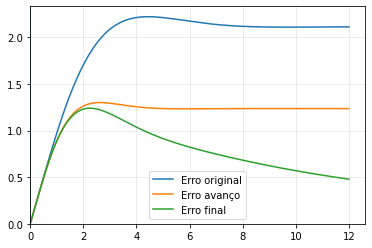

erro a entrada em rampa
teoria(final):  0.1235
real(final):    0.4782
teoria(avanço): 1.235
real(avanço):   1.235
teoria(orig):   2.113
real(orig):     2.112


In [22]:
# Erro relativo à rampa
plt.plot(t, u - y_ramp, label="Erro original")
plt.plot(t, u - y_ramp_c, label="Erro avanço")
plt.plot(t, u - y_ramp_f, label="Erro final")

# Configura a grade e tamanho do gráfico
plt.grid(True, which="both", axis="both", linewidth=0.5, alpha=0.5)
plt.axvline(linewidth=1, alpha=0.5)
plt.axhline(linewidth=1, alpha=0.5)
plt.xlim(left=0)
plt.ylim(bottom=0)

mylegend()
plt.show()


err_ramp_theo_c = (1 / (Kc * C * G * s).minreal()(0)).real
err_ramp_real_c = (u - y_ramp_c)[-1]
err_ramp_theo_f = (1 / (Kc * C * C2 * G * s).minreal()(0)).real
err_ramp_real_f = (u - y_ramp_f)[-1]


In [ ]:
print("erro a entrada em rampa")
print(f"teoria(final):  {err_ramp_theo_f:.04}")
print(f"real(final):    {err_ramp_real_f:.04}")
print(f"teoria(avanço): {err_ramp_theo_c:.04}")
print(f"real(avanço):   {err_ramp_real_c:.04}")
print(f"teoria(orig):   {err_ramp_theo:.04}")
print(f"real(orig):     {err_ramp_real:.04}")


A resposta à rampa foi conforme desejada. O curto período de tempo do gráfico não permite que a função acomode por completo, mas o erro com tempo suficientemente grande aproxima-se de 0.1235, ou um décimo do anterior.

## g)
Explique por que seria difícilprojetar um compensador por avanço (ou atraso-avanço) de fase em que os polos dominantes de malha fechada do sistema compensador + planta possuam as seguintes características:
$$
\zeta = \frac{\sqrt{2}}{2}, \omega_n = 10
$$

Não é difícil Forçar polos com essas características. Entretanto, como o sistema tem outros polos originalmente mais próximos do zero, seria difícil fazer que esses polos fossem dominantes.